# **CRISP-DM Methodology for Data Science:**
This methodology includes 5 steps:
* ***Step 1- Business & Data Understanding***: The goal of the first is to identify Variables (Number, Types, Quality), Classes (Number of classes) and Volume (Number of samples).
* ***Step 2- Data Preparation***: This step aims to clean, analyze, encode, normalize and split data.
* ***Step 3- Machine Learning***: The implementation of machine learning algorithms.
* ***Step 4- Performance Evaluation***: Evaluate the peformance using metrics.
* ***Step 5- Deployment***: Saving model and implementing a web interface (API, Service)

# **Step 1- Business & Data Understanding**

In [5]:
import pandas as pd
import numpy as np

# Load the raw data
df = pd.read_csv('apartments.csv',sep=",")
df=df.drop("title",axis=1)
df=df.drop("link",axis=1)
df=df.drop("ad_id",axis=1)

# Correct typos in column names for consistency
df.rename(columns={
    'meubl': 'meuble',
    'rfrigrateur': 'refrigerateur',
    'scurit': 'securite',
    'faade_extrieure': 'facde_exterieure',
    'cuisine_quipe': 'cuisine_equipee'
    
}, inplace=True)

# Replace "Prix à consulter" with NaN (null)
df['price'].replace("Prix à consulter", np.nan, inplace=True)


df.head()


C:\Users\USER\AppData\Local\Temp\ipykernel_2204\1149949955.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].replace("Prix à consulter", np.nan, inplace=True)


,price,location,surface,total_pieces,bedrooms,bathrooms,antenne_parabolique,ascenseur,chambre_rangement,chauffage_central,...,meuble,microondes,piscine,porte_blinde,refrigerateur,salon_europen,securite,terrasse,vue_sur_les_montagnes,vue_sur_mer
0,330 810 TND,"El Kantaoui,\n\t\t\t\t\t\t\t\tHammam Sousse",72\n\t\t\t\t\t\tm²,1 Pièce,1 Chambre,1 Salle de bain,0,1,0,1,...,0,0,1,0,1,0,1,1,0,0
1,NaN,"Les Jardins de Carthage,\n\t\t\t\t\t\t\t\tLe Kram",243\n\t\t\t\t\t\tm²,5 Pièces,4 Chambres,3 Salles de bains,0,1,0,1,...,0,0,0,1,0,0,1,1,0,0
2,235 000 TND,"Cité el Ghazela,\n\t\t\t\t\t\t\t\tRaoued",69\n\t\t\t\t\t\tm²,2 Pièces,1 Chambre,1 Salle de bain,1,1,1,1,...,0,0,0,1,0,1,1,0,0,0
3,1 255 000 TND,Mahdia,252\n\t\t\t\t\t\tm²,7 Pièces,3 Chambres,3 Salles de bains,1,0,0,1,...,0,0,0,1,0,0,1,1,0,1
4,NaN,La Soukra,108\n\t\t\t\t\t\tm²,3 Pièces,2 Chambres,2 Salles de bains,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0


### 🏠 Dataset Description

This dataset contains **34 variables** describing apartment characteristics and features:

* **title** *(deleted)*  
* **price**  
* **location**  
* **surface**  
* **total_pieces**  
* **bedrooms**  
* **bathrooms**  
* **link** *(deleted)*  
* **ad_id** *(deleted)*  
* **antenne_parabolique**  
* **ascenseur**  
* **chambre_rangement**  
* **chauffage_central**  
* **chemine**  
* **climatisation**  
* **concierge**  
* **cuisine_equipee**  
* **double_vitrage**  
* **entreseul**  
* **facade_exterieure**  
* **four**  
* **garage**  
* **jardin**  
* **machine_laver**  
* **meuble**  
* **microondes**  
* **piscine**  
* **porte_blinde**  
* **refrigerateur**  
* **salon_europen**  
* **securite**  
* **terrasse**  
* **vue_sur_les_montagnes**  
* **vue_sur_mer**


In [6]:
# Step 1: Basic Information
print("=== Dataset Overview ===")
print(f"Shape: {df.shape}")
print("\nColumns and Data Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())


=== Dataset Overview ===
Shape: (5047, 31)

Columns and Data Types:
price                    object
location                 object
surface                  object
total_pieces             object
bedrooms                 object
bathrooms                object
antenne_parabolique       int64
ascenseur                 int64
chambre_rangement         int64
chauffage_central         int64
chemine                   int64
climatisation             int64
concierge                 int64
cuisine_equipee           int64
double_vitrage            int64
entreseul                 int64
facde_exterieure          int64
four                      int64
garage                    int64
jardin                    int64
machine__laver            int64
meuble                    int64
microondes                int64
piscine                   int64
porte_blinde              int64
refrigerateur             int64
salon_europen             int64
securite                  int64
terrasse                  int64
vue_

### 🏠 Dataset Overview

The dataset contains **5047 samples** and **31 variables**, divided into two categories:

#### **Categorical Data**
- `price` — contains missing values  
- `location` — no missing values  
- `surface` — contains missing values  
- `total_pieces` — contains missing values  
- `bedrooms` — contains missing values  
- `bathrooms` — contains missing values  

#### **Numerical/Binary Data**
- `antenne_parabolique` — no missing values  
- `ascenseur` — no missing values  
- `chambre_rangement` — no missing values  
- `chauffage_central` — no missing values  
- `chemine` — no missing values  
- `climatisation` — no missing values  
- `concierge` — no missing values  
- `cuisine_equipee` — no missing values  
- `double_vitrage` — no missing values  
- `entreseul` — no missing values  
- `facde_exterieure` — no missing values  
- `four` — no missing values  
- `garage` — no missing values  
- `jardin` — no missing values  
- `machine__laver` — no missing values  
- `meuble` — no missing values  
- `microondes` — no missing values  
- `piscine` — no missing values  
- `porte_blinde` — no missing values  
- `refrigerateur` — no missing values  
- `salon_europen` — no missing values  
- `securite` — no missing values  
- `terrasse` — no missing values  
- `vue_sur_les_montagnes` — no missing values  
- `vue_sur_mer` — no missing values


In [7]:
# 1️⃣ Detect rows where all key columns are missing
key_cols = ['price', 'surface', 'bedrooms', 'bathrooms', 'total_pieces']
rows_all_missing = df[df[key_cols].isnull().all(axis=1)]

print("Rows with all key columns missing:")
print(rows_all_missing.index.tolist())
print(f"Total rows with all key columns missing: {len(rows_all_missing)}")

Rows with all key columns missing:
[109, 381, 585, 755, 789, 993, 1061, 1197, 1231, 1367, 1435, 1537, 1673, 1690, 1775, 1877, 2013, 2047, 2115, 2149, 2183, 2285, 2387, 2489, 2523, 2659, 2727, 2761, 2795, 2897, 2931, 2997, 3067, 3101, 3305, 3475, 3509, 3543, 3611, 3645, 3713, 3849, 4053, 4155, 4291, 4359, 4393, 4427, 4626, 4665, 4699, 4733, 4767, 4985, 4998, 5005]
Total rows with all key columns missing: 56


This step aims to impute, analyze, encode, normalize and split data.

In [ ]:
def to_int_safe(x):
    try:
        return int(x)
    except:
        return np.nan

def parse_price(val):
    if pd.isna(val):
        return np.nan
    s = str(val)
    if "Prix" in s:
        return np.nan
    s = s.replace("TND", "").replace("\u00a0", " ")
    s = re.sub(r"[^0-9]", "", s)
    return pd.to_numeric(s, errors="coerce")

def parse_surface(val):
    if pd.isna(val):
        return np.nan
    s = str(val).replace("\n", " ").replace("\t", " ").replace("\u00a0", " ")
    s = re.sub(r"[^0-9.]", "", s)
    return pd.to_numeric(s, errors="coerce")

def parse_number_from_text(val):
    if pd.isna(val):
        return np.nan
    m = re.search(r"(\d+)", str(val))
    return float(m.group(1)) if m else np.nan


### Basic feature engineering

In [ ]:
# Price (numeric TND)
if 'price' in df.columns:
    df['price_num'] = df['price'].apply(parse_price)

# Surface in m²
if 'surface' in df.columns:
    df['surface_m2'] = df['surface'].apply(parse_surface)

# Total rooms
if 'total_pieces' in df.columns:
    df['n_pieces'] = df['total_pieces'].apply(parse_number_from_text)

# Bedrooms / Bathrooms
for c in ['bedrooms', 'bathrooms']:
    if c in df.columns:
        df[c + '_num'] = df[c].apply(parse_number_from_text)

# Convert 0/1-like columns to nullable integers
bool_candidates = []
for c in df.columns:
    if c not in ['price_num','surface_m2','n_pieces','bedrooms_num','bathrooms_num']:
        vals = pd.Series(df[c].dropna().unique())
        if len(vals) > 0 and set(vals.astype(str)).issubset(set(['0','1'])):
            bool_candidates.append(c)

for c in bool_candidates:
    df[c] = pd.to_numeric(df[c], errors='coerce').astype('Int64')
# City from 'location'
if 'location' in df.columns:
    def city_from_location(s):
        if pd.isna(s): return np.nan
        return str(s).split(',')[0].strip()
    df['city'] = df['location'].apply(city_from_location)

    top_cities = df['city'].value_counts().head(15)
    print("Top 15 cities by listing volume:")
    display(top_cities)

# Price per m²
if {'price_num','surface_m2'}.issubset(df.columns):
    df['price_m2'] = df['price_num'] / df['surface_m2']
    print("Price per m² summary:")
    display(df['price_m2'].describe())


### Distributions (hist + KDE)

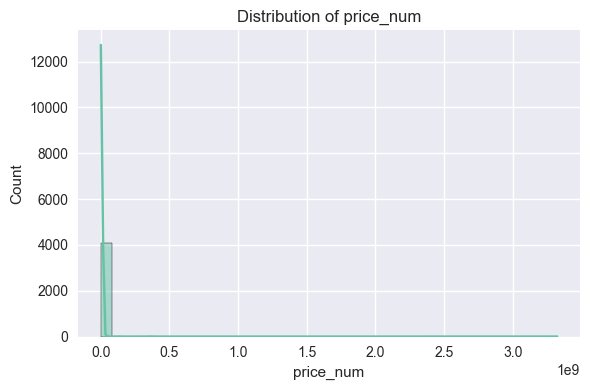

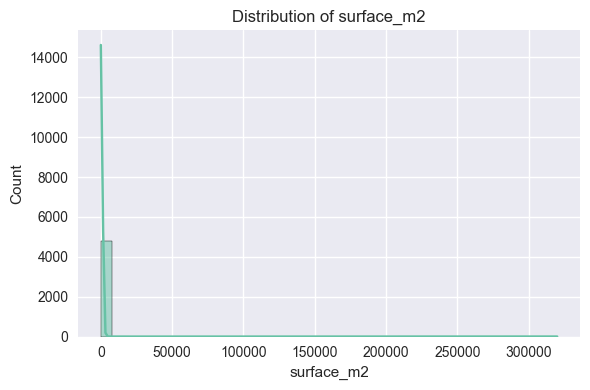

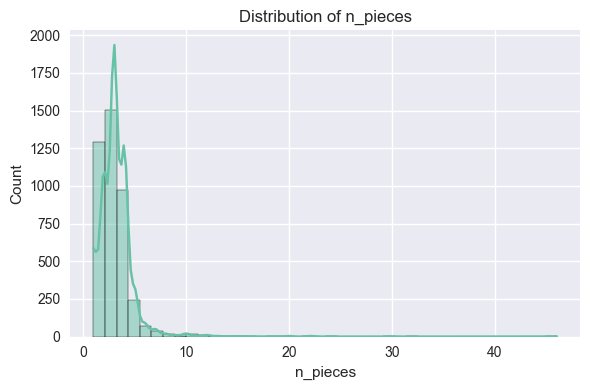

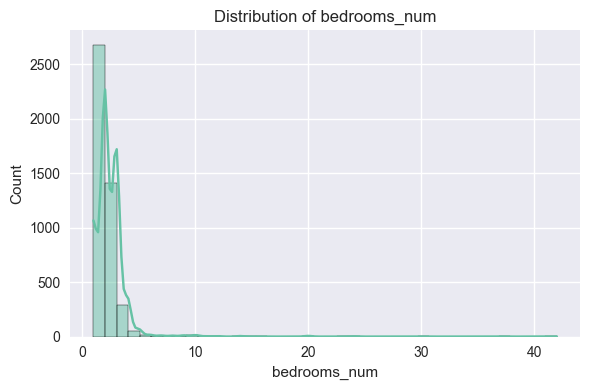

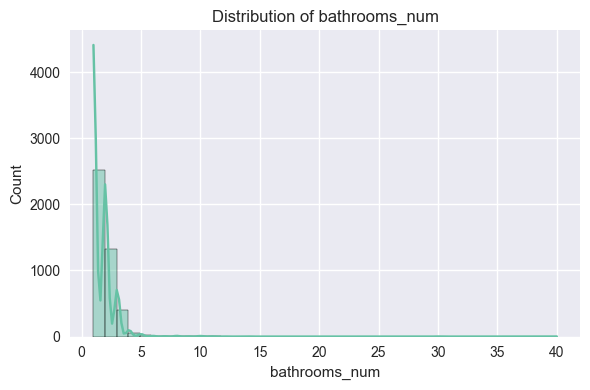

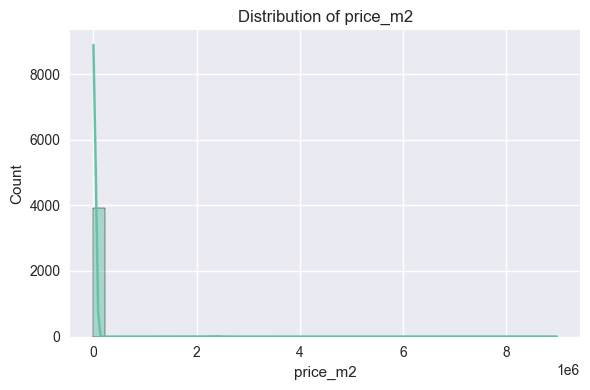

In [19]:
num_cols = [c for c in ['price_num','surface_m2','n_pieces','bedrooms_num','bathrooms_num','price_m2'] if c in df.columns]

for c in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[c], kde=True, bins=40)
    plt.title(f"Distribution of {c}")
    plt.tight_layout()
    plt.show()


### Boxplots for outliers


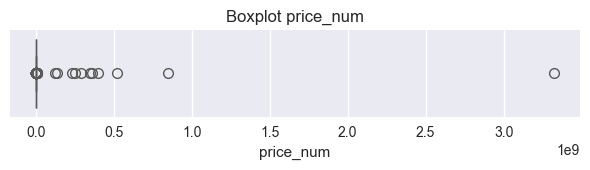

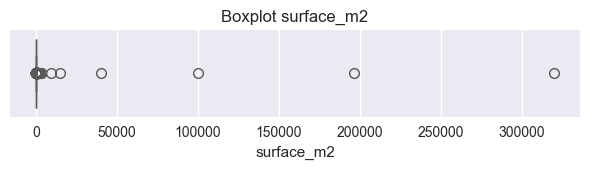

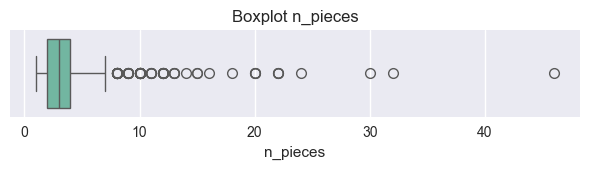

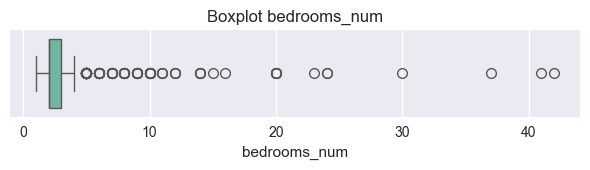

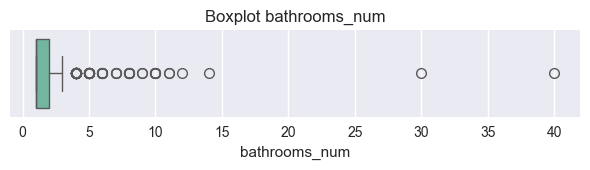

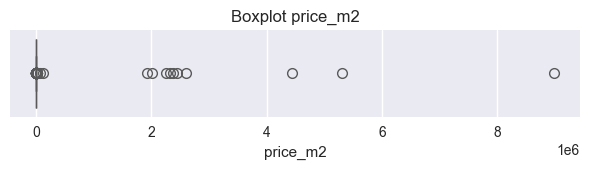

In [20]:
for c in num_cols:
    plt.figure(figsize=(6,1.8))
    sns.boxplot(x=df[c])
    plt.title(f"Boxplot {c}")
    plt.tight_layout()
    plt.show()


### Outlier detection (IQR)


In [21]:
def iqr_outliers(s):
    s = s.dropna()
    if s.empty:
        return pd.Series({'lower':np.nan,'upper':np.nan,'outlier_rate':np.nan})
    q1, q3 = np.percentile(s, [25, 75])
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    rate = ((s < lower) | (s > upper)).mean()
    return pd.Series({'lower':lower, 'upper':upper, 'outlier_rate':rate})

outlier_summary = pd.DataFrame({c: iqr_outliers(df[c]) for c in num_cols}).T
print("IQR bounds & outlier rate:")
display(outlier_summary)


IQR bounds & outlier rate:


,lower,upper,outlier_rate
price_num,-174561.875000,957603.12500,0.059617
surface_m2,-11.000000,253.00000,0.059963
n_pieces,-1.000000,7.00000,0.016260
bedrooms_num,0.500000,4.50000,0.028228
bathrooms_num,-0.500000,3.50000,0.024569
price_m2,-89.551758,6634.86313,0.026034


### Correlations (Spearman) + scatter

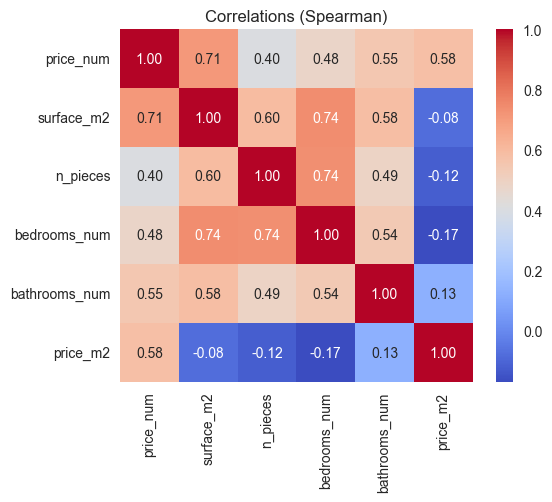

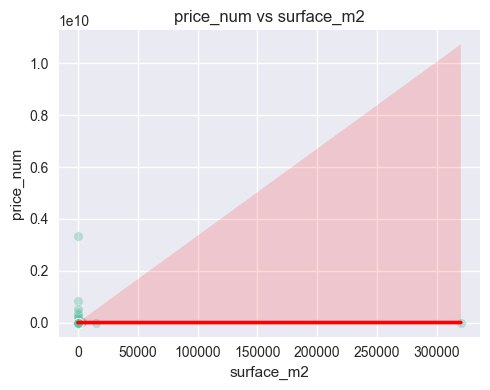

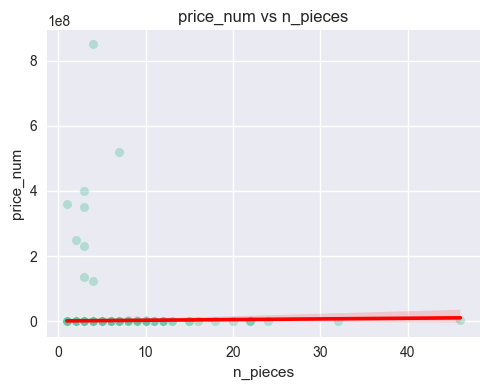

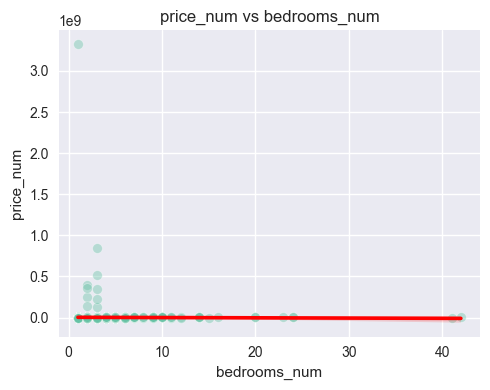

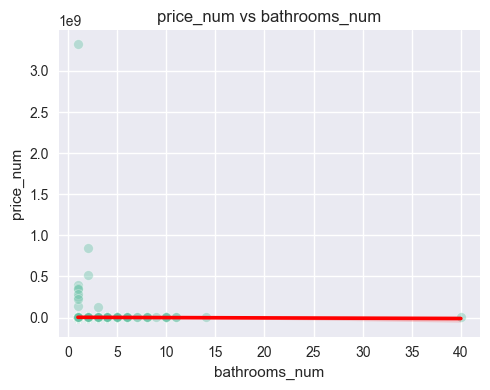

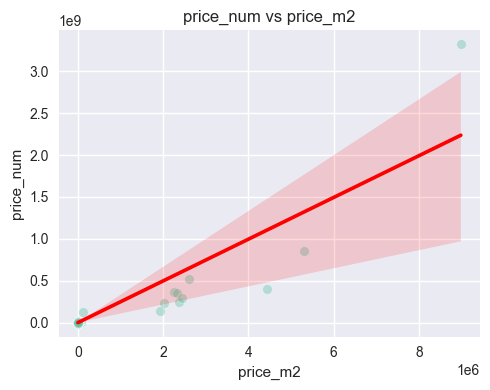

In [22]:
corr_cols = [c for c in num_cols if df[c].notna().sum() > 2]
corr = df[corr_cols].corr(method='spearman')

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlations (Spearman)")
plt.tight_layout()
plt.show()

target = 'price_num'
if target in df.columns:
    for c in [x for x in corr_cols if x != target]:
        plt.figure(figsize=(5,4))
        sns.scatterplot(data=df, x=c, y=target, alpha=0.4)
        sns.regplot(data=df, x=c, y=target, scatter=False, color='red')
        plt.title(f"{target} vs {c}")
        plt.tight_layout()
        plt.show()


# **Step 2 - Data Preparation**

### Objectives
- Clean categorical columns by removing units and converting to numerical formats.
- Handle missing values (impute or drop rows/columns as appropriate).
- Encode categorical variables (e.g., `location`).
- Normalize numerical features.
- Split data into training and testing sets.



In [8]:
# Define key columns
key_cols = ['price', 'bedrooms', 'bathrooms', 'total_pieces', 'surface']

# 1️ Drop rows where all key columns are missing
rows_all_missing = df[df[key_cols].isnull().all(axis=1)].index

# 2️ Drop rows where surface is missing AND at least one other key column is missing
rows_surface_partial_missing = df[df['surface'].isnull() & df[['price', 'bedrooms', 'bathrooms', 'total_pieces']].isnull().any(axis=1)].index

# Combine both sets of rows to drop
rows_to_drop = rows_all_missing.union(rows_surface_partial_missing)

# Drop the rows
df_cleaned = df.drop(index=rows_to_drop).reset_index(drop=True)

print(f"Total rows dropped: {len(rows_to_drop)}")
print(f"New dataset shape: {df_cleaned.shape}")

Total rows dropped: 188
New dataset shape: (4859, 31)


- Drop rows where all key columns (`price`, `surface`, `bedrooms`, `bathrooms`, `total_pieces`) are missing.
- Drop rows where `surface` is missing AND at least one other key column is missing, as these rows lack sufficient information for modeling.


In [9]:
import pandas as pd
import numpy as np

for col in key_cols:
    df_cleaned[col] = (
        df_cleaned[col]
        .astype(str)  # ensure string
        .str.replace(r'[\xa0\n\t\s]+', '', regex=True)  # remove spaces, tabs, newlines
        .str.replace(r'[^\d.]', '', regex=True)         # keep only digits and dot
    )
    # Convert to float, invalid strings become NaN
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Optional: check
print(df_cleaned[key_cols].head())
print(df_cleaned[key_cols].dtypes)

       price  bedrooms  bathrooms  total_pieces  surface
0   330810.0       1.0        1.0           1.0     72.0
1        NaN       4.0        3.0           5.0    243.0
2   235000.0       1.0        1.0           2.0     69.0
3  1255000.0       3.0        3.0           7.0    252.0
4        NaN       2.0        2.0           3.0    108.0
price           float64
bedrooms        float64
bathrooms       float64
total_pieces    float64
surface         float64
dtype: object


In [10]:
print("Dataset shape before removing price and surface outliers:", df_cleaned.shape)
print(df_cleaned[['price', 'surface']].describe())
# Remove outliers for price
Q1_price = df_cleaned['price'].quantile(0.25)
Q3_price = df_cleaned['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
df_cleaned = df_cleaned[
    (df_cleaned['price'] >= Q1_price - 1.5*IQR_price) &
    (df_cleaned['price'] <= Q3_price + 1.5*IQR_price)
]

# Remove outliers for surface
Q1_surface = df_cleaned['surface'].quantile(0.25)
Q3_surface = df_cleaned['surface'].quantile(0.75)
IQR_surface = Q3_surface - Q1_surface
df_cleaned = df_cleaned[
    (df_cleaned['surface'] >= Q1_surface - 1.5*IQR_surface) &
    (df_cleaned['surface'] <= Q3_surface + 1.5*IQR_surface)
]

# Check results
print("Dataset shape after removing price and surface outliers:", df_cleaned.shape)
print(df_cleaned[['price', 'surface']].describe())


Dataset shape before removing price and surface outliers: (4859, 31)
              price        surface
count  3.974000e+03    4803.000000
mean   2.166818e+06     280.723923
std    5.647192e+07    5637.969465
min    7.000000e+03      16.000000
25%    2.500000e+05      88.000000
50%    3.650000e+05     119.000000
75%    5.350000e+05     154.000000
max    3.324000e+09  320000.000000
Dataset shape after removing price and surface outliers: (3565, 31)
               price      surface
count    3565.000000  3565.000000
mean   375706.466199   114.720056
std    178035.554736    40.385789
min     11210.000000    16.000000
25%    245000.000000    85.000000
50%    350000.000000   113.000000
75%    470000.000000   140.000000
max    950000.000000   235.000000


In [11]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Columns to impute
cols_to_impute = ['price', 'surface', 'bedrooms', 'bathrooms']

# Initialize Iterative Imputer
imputer = IterativeImputer(random_state=42, max_iter=10, sample_posterior=True)

# Fit imputer and transform the dataset
df_cleaned[cols_to_impute] = imputer.fit_transform(df_cleaned[cols_to_impute])

# Round bedroom and bathroom counts to realistic integers
df_cleaned['bedrooms'] = df_cleaned['bedrooms'].round()
df_cleaned['bathrooms'] = df_cleaned['bathrooms'].round()

# Compute total_pieces based on logic:
# it should always be >= bedrooms + bathrooms
df_cleaned['total_pieces'] = df_cleaned[['bedrooms', 'bathrooms', 'total_pieces']].max(axis=1)
df_cleaned['total_pieces'] = df_cleaned['total_pieces'].round()

# Optional: inspect the results
print(df_cleaned[['price', 'surface', 'bedrooms', 'bathrooms', 'total_pieces']].head())
print(df_cleaned[['price', 'surface', 'bedrooms', 'bathrooms', 'total_pieces']].isnull().sum())


       price  surface  bedrooms  bathrooms  total_pieces
0   330810.0     72.0       1.0        1.0           1.0
2   235000.0     69.0       1.0        1.0           2.0
9   305000.0    106.0       2.0        1.0           3.0
11  480000.0    122.0       2.0        2.0           3.0
12  205000.0     85.0       2.0        1.0           2.0
price           0
surface         0
bedrooms        0
bathrooms       0
total_pieces    0
dtype: int64


In [12]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

cols_to_impute = ['price', 'surface', 'bedrooms', 'bathrooms']
imputer = IterativeImputer(random_state=42, max_iter=10, sample_posterior=True)
df_cleaned[cols_to_impute] = imputer.fit_transform(df_cleaned[cols_to_impute])

# Round bedroom and bathroom counts
df_cleaned['bedrooms'] = df_cleaned['bedrooms'].round()
df_cleaned['bathrooms'] = df_cleaned['bathrooms'].round()

# Ensure total_pieces >= bedrooms + bathrooms
df_cleaned['total_pieces'] = df_cleaned[['bedrooms', 'bathrooms', 'total_pieces']].apply(
    lambda row: max(row['total_pieces'], row['bedrooms'] + row['bathrooms']), axis=1
)
df_cleaned['total_pieces'] = df_cleaned['total_pieces'].round()

# Ensure price and surface positive
df_cleaned['price'] = df_cleaned['price'].apply(lambda x: max(x, 1))
df_cleaned['surface'] = df_cleaned['surface'].apply(lambda x: max(x, 1))

print(df_cleaned[['price', 'surface', 'bedrooms', 'bathrooms', 'total_pieces']].head())

       price  surface  bedrooms  bathrooms  total_pieces
0   330810.0     72.0       1.0        1.0           2.0
2   235000.0     69.0       1.0        1.0           2.0
9   305000.0    106.0       2.0        1.0           3.0
11  480000.0    122.0       2.0        2.0           4.0
12  205000.0     85.0       2.0        1.0           3.0


In [13]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score# 5️⃣ Define features and target
# =========================
X = df_cleaned.drop(columns=['price'])
y = df_cleaned['price']

categorical_features = ['location']  # high-cardinality categorical
numerical_features = ['surface', 'bedrooms', 'bathrooms', 'total_pieces']

# =========================
# 6️⃣ Preprocessing: scaling and one-hot encoding
# =========================
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ]
)

# =========================
# 7️⃣ Split data
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =========================
# 8️⃣ Build pipelines
# =========================
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, random_state=42))
])

# =========================
# 9️⃣ Train models
# =========================
lr_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

# =========================
#  🔟 Evaluate models
# =========================
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"MSE: {mse:.2f}, R2: {r2:.2f}")

print("Linear Regression Performance:")
evaluate_model(lr_pipeline, X_test, y_test)

print("\nRandom Forest Performance:")
evaluate_model(rf_pipeline, X_test, y_test)

Linear Regression Performance:
MSE: 10304939396.92, R2: 0.70

Random Forest Performance:
MSE: 12916223226.59, R2: 0.62
